https://playground.tensorflow.org

# 1. Create Dataset

In [2]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
n_pts = 500
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y).view(n_pts,1)

In [4]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0,1])
    plt.scatter(X[y==1, 0], X[y==1,1])

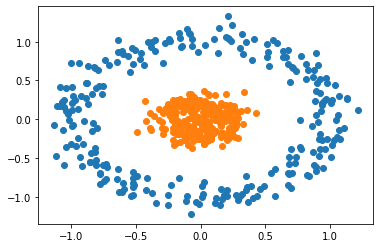

In [5]:
scatter_plot()

# 2. Model Setup

In [16]:
class Model(nn.Module):
    def __init__(self, input_size, h1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, h1)
        self.linear2 = nn.Linear(h1, output_size)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0
    
    def reset_parameters(self):
        self.linear.reset_parameters()
        self.linear2.reset_parameters()

In [17]:
torch.manual_seed(2)
model = Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


# 3. Model Training

[Optimizer의 종류와 특성](https://onevision.tistory.com/entry/Optimizer-%EC%9D%98-%EC%A2%85%EB%A5%98%EC%99%80-%ED%8A%B9%EC%84%B1-Momentum-RMSProp-Adam)

In [51]:
model.reset_parameters()
criterion = nn.BCELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [52]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print(f"epoch: {i} loss: {loss.item()}")
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

epoch: 0 loss: 0.7046693563461304
epoch: 1 loss: 0.693011462688446
epoch: 2 loss: 0.697641909122467
epoch: 3 loss: 0.6989357471466064
epoch: 4 loss: 0.6956239938735962
epoch: 5 loss: 0.6926888823509216
epoch: 6 loss: 0.6923160552978516
epoch: 7 loss: 0.6934652924537659
epoch: 8 loss: 0.6939082145690918
epoch: 9 loss: 0.6927345991134644
epoch: 10 loss: 0.6905741095542908
epoch: 11 loss: 0.6884321570396423
epoch: 12 loss: 0.686795175075531
epoch: 13 loss: 0.6853386163711548
epoch: 14 loss: 0.6832672357559204
epoch: 15 loss: 0.6799770593643188
epoch: 16 loss: 0.6753726601600647
epoch: 17 loss: 0.6696913838386536
epoch: 18 loss: 0.6631906628608704
epoch: 19 loss: 0.6559524536132812
epoch: 20 loss: 0.6478554606437683
epoch: 21 loss: 0.6386733055114746
epoch: 22 loss: 0.6282324194908142
epoch: 23 loss: 0.6165350079536438
epoch: 24 loss: 0.6037745475769043
epoch: 25 loss: 0.5902354121208191
epoch: 26 loss: 0.5761540532112122
epoch: 27 loss: 0.5616415739059448
epoch: 28 loss: 0.546724677085876

epoch: 723 loss: 0.001958324573934078
epoch: 724 loss: 0.0019537382759153843
epoch: 725 loss: 0.0019491624552756548
epoch: 726 loss: 0.001944610383361578
epoch: 727 loss: 0.0019400720484554768
epoch: 728 loss: 0.0019355504773557186
epoch: 729 loss: 0.001931044040247798
epoch: 730 loss: 0.0019265603041276336
epoch: 731 loss: 0.0019220858812332153
epoch: 732 loss: 0.0019176313653588295
epoch: 733 loss: 0.0019131929147988558
epoch: 734 loss: 0.0019087735563516617
epoch: 735 loss: 0.0019043658394366503
epoch: 736 loss: 0.001899972790852189
epoch: 737 loss: 0.0018955995328724384
epoch: 738 loss: 0.0018912453670054674
epoch: 739 loss: 0.00188690226059407
epoch: 740 loss: 0.0018825758015736938
epoch: 741 loss: 0.001878266455605626
epoch: 742 loss: 0.0018739703809842467
epoch: 743 loss: 0.001869694679044187
epoch: 744 loss: 0.0018654301529750228
epoch: 745 loss: 0.001861183438450098
epoch: 746 loss: 0.0018569505773484707
epoch: 747 loss: 0.0018527331994846463
epoch: 748 loss: 0.001848532469011

Text(0.5, 0, 'epoch')

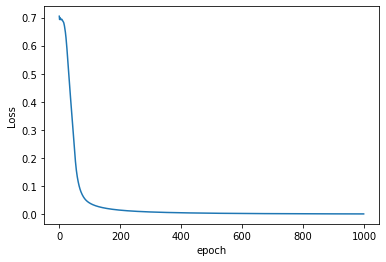

In [53]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

# 4. Testing Model

In [73]:
def plot_decision_boundary(X, y, margin=0.25):
    x1_span = np.linspace(min(X[:,0])-margin, max(X[:,0])+margin)
    x2_span = np.linspace(min(X[:,1])-margin, max(X[:,1])+margin)
    x1, x2 = np.meshgrid(x1_span, x2_span) # Create grid points covering all area where data exists
    X_grid = torch.Tensor(np.c_[x1.ravel(), x2.ravel()])
    prob = model.forward(X_grid)
    prob = prob.view(x1.shape).detach().numpy()
    plt.contourf(x1, x2, prob)

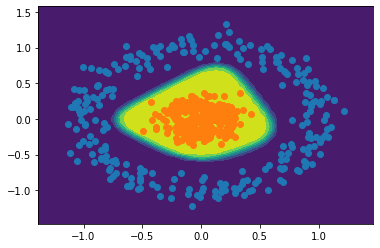

In [74]:
plot_decision_boundary(X,y)
scatter_plot()

Prediction is 1


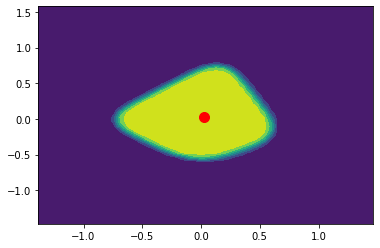

In [75]:
x = 0.025
y = 0.025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x], [y], marker="o", markersize=10, color="red")
print(f"Prediction is {prediction}")
plot_decision_boundary(X, y)

# Appendix

![loss graph](../resources/loss_graph.png)